In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel("Simmons.xlsx")
df

,Customer,Spending,Card,Coupon
0,1,2.291,0,0
1,2,2.359,0,0
2,3,3.358,0,0
3,4,3.254,0,1
4,5,3.853,1,1
5,6,4.257,1,1
6,7,2.256,0,0
7,8,3.254,1,1
8,9,2.357,1,0
9,10,7.256,1,1


__Example: 5000 copies of an expensive sales catalog have been printed, and each catalog includes a coupon that provides a 50% discount on purchases of $200 or more. The catalog are expensive and Simmons would like to send them to only those customers who have the highest probability of using the coupon.__

__Management thinks that annual spending at Simmons stores and whether a customer has a Simmons credit card
are two variables that might be helpful in predicting whether a customer who receives the catalog will
use the coupon.
Simmons sent the catalog to each of the 40 customers selected. At the end of a test period, Simmonst noted
whether the customer used the coupon or not.__

In [10]:
df['Coupon'].unique()

array([0, 1], dtype=int64)

In [13]:
df['Coupon'].value_counts()

1    21
0    19
Name: Coupon, dtype: int64

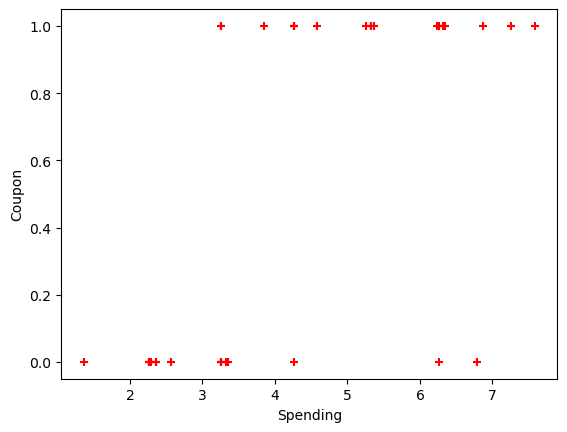

In [5]:
plt.scatter(df.Spending, df.Coupon, marker = '+', color = 'red')
plt.xlabel('Spending')
plt.ylabel('Coupon')
plt.show()

In [6]:
x = df[['Card', 'Spending']]
y = df['Coupon']

In [7]:
import statsmodels.api as sm
x1 = sm.add_constant(x)
logit_model = sm.Logit(y, x1)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.374153
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.459     
Dependent Variable: Coupon           AIC:              35.9322   
Date:               2023-07-05 19:46 BIC:              40.9988   
No. Observations:   40               Log-Likelihood:   -14.966   
Df Model:           2                LL-Null:          -27.676   
Df Residuals:       37               LLR p-value:      3.0215e-06
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
const         -4.9161    1.5928  -3.0864  0.0020  -8.0380  -1.7942
Card           1.9662    0.9311   2.1117  0.0347   0.1413   3.

__Having a credit card is associated with an average increse of 1.9662 in the log odds of using the coupon. <br>
Each additional $1000 spending is associated with an average increse of 0.9518 in the log odds of using the coupon. <br> LLR p-value can be thought of as the substitute to the p-value for the overall F-value of a linear regression model. In our case the value is less than 0.5 therefore the overall model is "useful" and is better at predicting the values of the response variable compared to a model with no predictor variables.__

In [8]:
G = 2 * (-27.676 - (-14.966))
G

-25.419999999999998

In [16]:
import scipy
from scipy.stats import chi2
chi2.pdf(-25.4199,2)

0.0

__We would reject the null hypothesis and conclude that the overall model is significant.__